# With Out Sacling Of Data

In [1]:
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt 
# Import necessary modules
from sklearn import linear_model
from sklearn.cross_validation import train_test_split


In [2]:
# Load data
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ' , sep = ';') 
X = df.drop('quality' , 1).values #axis=1 denotes that we are referring to a column, not a row
#drop target variable
y1 = df['quality'].values
y = y1 <= 5 # is the rating <= 5?


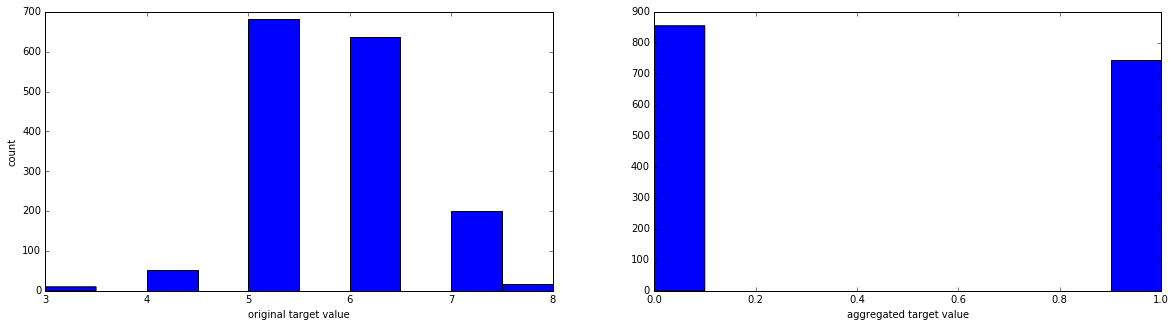

In [3]:
# plot histograms of original target variable
# and aggregated target variable
plt.figure(figsize=(20,5));
plt.subplot(1, 2, 1 );
plt.hist(y1);
plt.xlabel('original target value')
plt.ylabel('count')
plt.subplot(1, 2, 2);
plt.hist(y)
plt.xlabel('aggregated target value')
plt.show() 

In [4]:
# Split the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
#initial logistic regression model
lr = linear_model.LogisticRegression()


In [7]:
# fit the model
lr = lr.fit(X_train, y_train)
print('Logistic Regression score for training set: %f' % lr.score(X_train, y_train))
from sklearn.metrics import classification_report
y_true, y_pred = y_test, lr.predict(X_test)
print(lr.score(y_test,y_pred))
print(classification_report(y_true, y_pred)) 

Logistic Regression score for training set: 0.752932


C:\Users\sumanth818\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: X has 320 features per sample; expecting 11

# With scaling

In [11]:
from sklearn.preprocessing import scale
Xs = scale(X)
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)
lr_2 = lr.fit(Xs_train, y_train)
print('Scaled Logistic Regression score for test set: %f' % lr_2.score(Xs_test, y_test))
y_true, y_pred = y_test, lr_2.predict(Xs_test)
print(classification_report(y_true, y_pred)) 

Scaled Logistic Regression score for test set: 0.740625
             precision    recall  f1-score   support

      False       0.79      0.74      0.76       179
       True       0.69      0.74      0.72       141

avg / total       0.74      0.74      0.74       320



In [12]:
#we can see that there is improvement with scaling